<a href="https://colab.research.google.com/github/alouwyck/vives-intro-to-ai/blob/main/topic8b/topic8_intro_ML_training_evaluation_demo_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

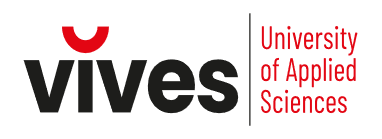<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
VIVES BUSINESS ACADEMY<br>
Academic Year 2023-2024<br>
Andy Louwyck

---



---



# **INTRODUCTION TO MACHINE LEARNING: TRAINING AND EVALUATION**

## **Python libraries**

In [ ]:
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import matplotlib.pyplot as plt  # python library for visualizations

## **Classification**

### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Example 1

##### *Data exploration*

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
df.head()

In [ ]:
len(df)  # length of dataframe = number of rows!

In [ ]:
df.sex.unique()  # method 'unique' returns unique values

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# group by sex
df.groupby('sex').mean()  # method mean calculates the average

In [ ]:
# scatter plot
def scatter_plot(df):
    _, ax = plt.subplots()
    df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax);  # men: yellow
    df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax);  # women: green
    plt.grid()
    return ax

scatter_plot(df);

In [ ]:
X = df[['height', 'weight']].values  # put features height and weight into matrix X
y = (df.sex=="f").values.astype(int)  # convert column df.sex containing the labels to boolean vector y

##### *Model training*

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)  # K = 5
model.fit(X, y)

##### *Model evaluation*

In [ ]:
model.score(X, y)  # calculates the accuracy

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('m', 'f'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

In [ ]:
# classification report
from sklearn.metrics import classification_report

y_pred = model.predict(X)  # predictions

print(classification_report(y_true=y, y_pred=y_pred))

##### *Making predictions*

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

In [ ]:
scatter_plot(df)
plt.plot(X_new[:, 0], X_new[:, 1], 'ro');  # new points are red

##### *The optimal K value*

In [ ]:
# determine optimal K using a validation set

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.5, random_state=1)

print('training set:')
print(X_train.shape)
print(y_train.shape)

print('validation set:')
print(X_val.shape)
print(y_val.shape)

In [ ]:
# looping over odd K values between 1 and 21

Ks = np.arange(start=1, stop=23, step=2)  # 23 is not included!

acc_train = np.zeros(len(Ks))
acc_val = np.zeros(len(Ks))
for i, K in enumerate(Ks):
    model = KNeighborsClassifier(K)
    model.fit(X_train, y_train)
    acc_train[i] = model.score(X_train, y_train)
    acc_val[i] = model.score(X_val, y_val)

In [ ]:
# plot result
plt.plot(Ks, acc_train, 'b.-',
         Ks, acc_val, 'r.-');
plt.grid();
plt.xlabel('K');
plt.ylabel('accuracy');
plt.legend(['training set', 'validation set']);

In [ ]:
# optimal K
K_opt = Ks[np.argmax(acc_val)]
print("optimal K:", K_opt)

#### Example 2

In [ ]:
# try it yourself!

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  # linear model for binary classification

#### Example 1

In [ ]:
# thermostat dataset
temperature = [17.1, 15.6, 23.1, 19.8, 12.9, 20.3, 14.7, 16.2]
heating = ['off', 'on', 'off', 'off', 'on', 'off', 'on', 'on']
table = pd.DataFrame(dict(temperature=temperature, heating=heating))
table

In [ ]:
# plot the data
def plot_temperature_heating(table):
    '''
    plots heating vs temperature
    table: Pandas DataFrame with columns 'temperature' and 'heating'
    returns: axes
    '''
    _, ax = plt.subplots(1, 1, figsize=(8, 2))
    on = table.heating == 'on'
    off = ~on
    plt.plot(table[on].temperature, np.ones(on.sum()), 'go');
    plt.plot(table[off].temperature, np.zeros(off.sum()), 'ro');
    plt.xlabel('temperature');
    plt.ylabel('heating');
    plt.yticks((0, 1));
    ax.set_yticklabels(('off', 'on'))
    plt.grid();
    return ax

plot_temperature_heating(table);

In [ ]:
# training the model
X, y = table[['temperature']].values, (table.heating=='on').values  # feature, labels
model = LogisticRegression(penalty=None)  # instantiate
model.fit(X, y)  # fit data

In [ ]:
# evaluate model
model.score(X, y)  # accuracy

In [ ]:
# make prediction
new_temperature = 17
model.predict([[new_temperature]]).item()  # predict label for new temperature value

In [ ]:
# determine threshold
threshold = -model.intercept_.item() / model.coef_.item()
print(f'threshold is {threshold}°C')

> $f = aT + b$

> $p = \sigma(f) = \frac{1}{1+\exp(-f)}$

The threshold is found by evaluating $f=0$, which yields $-b/a$.

In [ ]:
# plot
ax = plot_temperature_heating(table);
sigmoid = lambda f: 1 / (1 + np.exp(-f))
f = lambda x: model.coef_.item() * x + model.intercept_.item()
x = np.linspace(12, 24, 1000)
xl, yl = ax.get_xlim(), ax.get_ylim()
ax.plot(x, sigmoid(f(x)), 'k--');
ax.plot(threshold * np.ones(2), [-1, 2], 'b-');
ax.plot(new_temperature, 0, 'bo');  # new data point
ax.set_xlim(xl); ax.set_ylim(yl);

#### Example 2

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
X = df[['height', 'weight']].values  # put features height and weight into matrix X
y = (df.sex=="f").values.astype(int)  # convert column df.sex containing the labels to boolean vector y

In [ ]:
model = LogisticRegression(penalty=None)
model.fit(X, y)

In [ ]:
model.score(X, y)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('m', 'f'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

In [ ]:
p = model.predict_proba(X_new)  # returns the probabilities
np.round(p, 2)  # round to two decimals

In [ ]:
w, b = model.coef_[0].flatten(), model.intercept_.item()  # weights w and bias b
w, b

> $f = w_1X_1+w_2X_2+b$

The separating straight-line is found easily by evaluating $f=0$, which gives:

> $X_2 = -\dfrac{w_1X_1+b}{w_2}$


In [ ]:
_, ax = plt.subplots()
df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax);  # men: yellow
df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax);  # women: green
plt.plot(X_new[:, 0], X_new[:, 1], 'ro')  # new points are red

# adding the separating straight line in red
xline = np.linspace(150, 200, 2)
yline = -(xline * w[0] + b) / w[1]
plt.plot(xline, yline, 'r-');

plt.ylim((50, 90))
plt.grid()

#### Example 3

In [ ]:
# try it yourself

# feature scaling: salary / 1000

### Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder

#### Example

In [ ]:
df = pd.read_csv('play.txt', sep=' ').iloc[:, :-1]  # last column is empty, so we don't need it...
df

In [ ]:
features = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
labels = df['Play']

In [ ]:
# feature encoding
feature_encoder = OrdinalEncoder()
feature_encoder.fit(features)
X = feature_encoder.transform(features)
print(X)

In [ ]:
def get_feature_value(encoder, feature, id):
    icol = np.where(encoder.feature_names_in_ == feature)[0][0]
    return encoder.categories_[icol][id]

In [ ]:
get_feature_value(feature_encoder, "Temperature", 2)

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(labels)
y = label_encoder.transform(labels)

print("0 is", label_encoder.classes_[0])
print("1 is", label_encoder.classes_[1])

In [ ]:
# training the model
model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)

In [ ]:
plot_tree(model,
          feature_names=feature_encoder.feature_names_in_,
          class_names=label_encoder.classes_,
          impurity=False, filled=True, fontsize=8, rounded=True);

Overfitting!

In [ ]:
model = DecisionTreeClassifier(max_depth=2)  # limit the depth of the tree by setting max_depth to 2
model.fit(X, y)
model.score(X, y)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('No', 'Yes'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

In [ ]:
out = plot_tree(model,
                feature_names=feature_encoder.feature_names_in_,
                class_names=label_encoder.classes_,
                impurity=False, filled=True, fontsize=8, rounded=True);

# convert the integers back to strings - this for loop only works for this tree!
for i in [0, 2]:
    out[i].set_text(out[i].get_text().replace("<= 0.5", feature_encoder.categories_[i][0]))

In [ ]:
# new data point
new = pd.DataFrame(dict(Outlook=['Overcast'],
                        Temperature=['Cool'],
                        Humidity=['High'],
                        Wind=['Strong'],
                        Play=['????']))
new

In [ ]:
# encode the features of new data point!!
Xnew = feature_encoder.transform(new[['Outlook', 'Temperature', 'Humidity', 'Wind']])

In [ ]:
model.predict(Xnew).item()

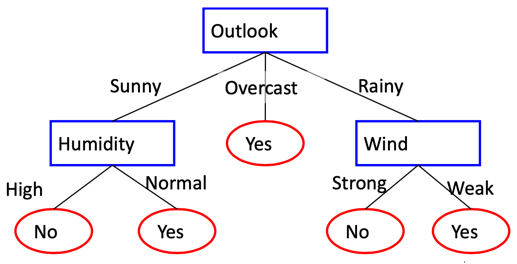

## **Regression**

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


Simple linear regression: finding the best fitting straight-line:

> $y=ax+b$

Minimizing the loss function:

> $L = \sum_{i=1}^n (y_i - \hat{y}_i)^2$



#### Example 1

In [ ]:
df = pd.read_excel('age_couple.xlsx')
df.head()

In [ ]:
len(df)  # length of dataframe = number of rows!

In [ ]:
# intuitive regression line: y = x

husband, wife = tuple(df.columns[1:])  # assign column names to variables
df.plot.scatter(x=husband, y=wife)  # make scatter plot using method plot.scatter
y = x = np.linspace(0, 100, 100)
plt.plot(x, y, 'k--')  # diagonal y = x
plt.grid()  # add grid

In [ ]:
X = df[husband].values.reshape(-1, 1)  # feature X - must be 2D!
y = df[wife].values  # target y

In [ ]:
# train model
model = LinearRegression()  # instantiate LinearRegression object
model.fit(X, y)  # training the model = fitting the data points

In [ ]:
# evaluate model
model.score(X, y)  # calculates the R² score

In [ ]:
# other metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# first get predictions...
yp = model.predict(X)

# ...so we can calculate the scores
print('MAE is', mean_absolute_error(y_true=y, y_pred=yp))
print('MSE is', mean_squared_error(y_true=y, y_pred=yp))
print('RMSE is', mean_squared_error(y_true=y, y_pred=yp, squared=False))  # set squared to False to get RMSE

In [ ]:
# get parameters
a, b = model.coef_[0], model.intercept_  # slope a and intercept b
print(f'slope a is {a:.3f}, intercept b is {b:.3f}')

In [ ]:
# plot result
X_line = np.linspace(0, 100, 100)  # create 100 equally spaced points between 0 and 100
y_line = a * X_line + b  # line of best fit derived by the regression model
df.plot.scatter(x=husband, y=wife)
plt.plot(X_line, X_line, 'k--', X_line, y_line, 'r-')
plt.legend(['data', 'intuitive', 'ML model'])
plt.grid()

In [ ]:
# make predictions
X_new = np.array([[40],   # husband of age 40
                  [80]])  # husband of age 80
np.round(model.predict(X_new))

#### Example 2

In [ ]:
# try it yourself

### Polynomial Regression


> $y = b + a_1x + a_2x^2 + ... + a_nx^n = b + \sum_{j=1}^{n}a_jx^j$


#### Example

In [ ]:
happy = pd.read_json('wage_vs_happiness.json', orient='table');
happy.head()

In [ ]:
happy.info()

In [ ]:
happy.describe().T

In [ ]:
happy.plot.scatter('wage', 'happiness');
plt.grid();

In [ ]:
# simple linear regression

X, y = happy[['wage']].values, happy['happiness'].values  # feature, target

linreg = LinearRegression()
linreg.fit(X, y)
linreg.score(X, y)  # R²

In [ ]:
# plot result
happy.plot.scatter('wage', 'happiness');
plt.grid();
Xline = np.array([[0], [20]])
plt.plot(Xline, linreg.predict(Xline), 'r-');

In [ ]:
# try non-linear polynomial fit

X = X.flatten()               # polyfit wants 1D array!
a = np.polyfit(X, y, deg=15)  # polynomial fit of degree 15

In [ ]:
# evaluate

from sklearn.metrics import r2_score  # import function to calculate R² score

yp = np.polyval(a, X)          # predictions
r2_score(y_true=y, y_pred=yp)  # R² score

In [ ]:
# plot result
happy.plot.scatter('wage', 'happiness');
plt.grid();
yl = plt.ylim()
Xcurve = np.linspace(0, 20, 100)
plt.plot(Xcurve, np.polyval(a, Xcurve), 'r-');
plt.ylim(yl);

#### Underfitting and Overfitting

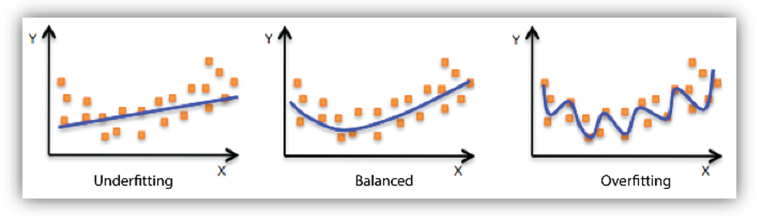

In [ ]:
# split into training and validation set

from sklearn.model_selection import train_test_split

X, y = happy[['wage']].values, happy['happiness'].values  # feature, target

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.5,   # 50% is used for validation
                                                  random_state=0)  # set random seed

In [ ]:
plt.plot(X_train.flatten(), y_train, 'b.', label='training set');
plt.plot(X_val.flatten(), y_val, 'r.', label='validation set');
plt.legend();
plt.xlabel('wage');
plt.ylabel('happiness');
plt.grid();

In [ ]:
# simple linear regression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f"training: {linreg.score(X_train, y_train)}")
print(f"validation: {linreg.score(X_val, y_val)}")

In [ ]:
# 15 degree polynomial fit

a = np.polyfit(X_train.flatten(), y_train, deg=15)  # polynomial fit of degree 15
print(f"training: {r2_score(y_true=y_train, y_pred=np.polyval(a, X_train.flatten()))}")
print(f"validation: {r2_score(y_true=y_val, y_pred=np.polyval(a, X_val.flatten()))}")

In [ ]:
# loop over range of degrees between 1 and 20

from sklearn.metrics import mean_absolute_error as MAE  # import MAE function

mae_train = []  # list of MAEs of training data
mae_val = []    # list of MAEs of validation data
coef = []       # list of coefficients
degrees = range(1, 21)  # range of degrees of polynomial function

for degree in degrees:  # loop through degrees

    a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data
    yp_train = np.polyval(a, X_train.flatten())         # predictions of training data
    yp_val = np.polyval(a, X_val.flatten())             # predictions of validation data

    coef.append(a)  # coefficients
    mae_train.append(MAE(y_true=y_train, y_pred=yp_train))  # MAE of training data
    mae_val.append(MAE(y_true=y_val, y_pred=yp_val))        # MAE of validation data

In [ ]:
# plot result

from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# initialization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # figure containing 2 axes
ax1.plot(X_train.flatten(), y_train, 'b.', label='training set');
ax1.plot(X_val.flatten(), y_val, 'r.', label='validation set');
ax1.legend();
xl, yl = ax1.get_xlim(), ax1.get_ylim()
Xcurve = np.linspace(0, 20, 1000)
regression_line = ax1.plot(Xcurve, np.polyval(coef[0], Xcurve),'k-')
ax1.set_title('degree = 1');
ax1.set_xlabel('wage');
ax1.set_ylabel('happiness');
ax1.set_xlim(xl);
ax1.set_ylim(yl);
ax1.grid();
ax2.yaxis.set_label_position("right");
ax2.yaxis.tick_right();
mae_train_line = ax2.plot(degrees[0], mae_train[0], 'b.-', label='training');
mae_val_line = ax2.plot(degrees[0], mae_val[0], 'r.-', label='validation');
ax2.legend();
ax2.set_xlabel('Degree');
ax2.set_ylabel('MAE');
ax2.set_xlim((0, 21));
ax2.set_ylim((0.74, 0.99));
ax2.grid();

# update function for animation
def update(degree):
    yplot = np.polyval(coef[degree-1], xplot)
    regression_line[0].set_ydata(yplot)
    ax1.set_title('degree = ' + str(degree));
    mae_train_line[0].set_xdata(degrees[:degree])
    mae_train_line[0].set_ydata(mae_train[:degree])
    mae_val_line[0].set_xdata(degrees[:degree])
    mae_val_line[0].set_ydata(mae_val[:degree])

# create animation
ani = FuncAnimation(fig, update, frames=degrees, blit=False, repeat=True)
plt.close()
ani

In [ ]:
# model complexity graph

plt.plot(degrees, mae_train, 'b.-', label='training');
plt.plot(degrees, mae_val, 'r.-', label='validation');
plt.legend();
plt.xlabel('Degree');
plt.ylabel('MAE');
plt.grid();

In [ ]:
# lowest validation MAE = optimal degree = 5

a = np.polyfit(X.flatten(), y, deg=5)
yp = np.polyval(a, X.flatten())
MAE(y_true=y, y_pred=yp)

In [ ]:
# plot result
happy.plot.scatter(x='wage', y='happiness');
Xcurve = np.linspace(0, 20, 100)
plt.plot(Xcurve, np.polyval(a, Xcurve), 'r-');
plt.grid();

It is common practice to create a third dataset, the **test set**

#### Regularization

In [ ]:
# LASSO regression

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 10

lasso = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    Lasso(alpha=0.01, tol=0.001)
)

lasso.fit(X, y);

MAE(y_true=y, y_pred=lasso.predict(X))

In [ ]:
# plot result
happy.plot.scatter(x='wage', y='happiness');
xplot = np.linspace(0, 20, 100).reshape(-1, 1)
plt.plot(xplot, lasso.predict(xplot), 'r-');
plt.grid();

## **Clustering**

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

#### Example 1

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
df.plot.scatter(x='height', y='weight')
plt.grid()

In [ ]:
X = df[['height', 'weight']].values

In [ ]:
model = KMeans(n_clusters=2, random_state=20)  # K = 2
model.fit(X)  # only pass X! Unsupervised learning!

In [ ]:
yp = model.predict(X)  # predicted labels

In [ ]:
y = (df.sex=="f").values.astype(int)  # de real labels
(y == yp).sum() / len(y)  # accuracy = number of correct predictions divided by total number of data points

Sometimes we have to flip the labels as follows:

```python
b = yp == 1
yp[b] = 0
yp[~b] = 1
```

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

In [ ]:
df['prediction'] = np.array(['m', 'f'])[yp]  # 'm' is 0 and 'f' is 1
df.head()

In [ ]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax1)
df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax1)
ax1.plot(X_new[:, 0], X_new[:, 1], 'ro')
ax1.set_title("true labels")
ax1.grid()
df.loc[df.prediction=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax2)
df.loc[df.prediction=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax2)
ax2.plot(X_new[:, 0], X_new[:, 1], 'ro')
ax2.set_title("cluster labels")
ax2.grid()

#### Example 2

In [ ]:
# try it yourself

---